<h1><center>Лабораторная работа № 3</center></h1>
<h3><center>"Линейная регрессия"</center></h3>

Необходимо решить задачу предсказания стоимости дома в зависимости от его характеристик. Задача решается в рамках платформы онлайн-конкурсов по машинному обучению Kaggle. Ссылка на задание.

Рекомендуется перед выполнением задания изучить отличный туториал, предоставляемый на сайте. В нем разбирается задача классификации, что соответствует лабораторной работе №4, но все действия связанные с подготовкой данных полностью актуальны для этой лабораторной работы.

**1\. Провести предподготовку данных**

Перед выполнением этого пункта рекомендуется посмотреть лекцию по Pandas.

(Обязательно) Необходимо перевести категориальные фичи в числовые, отмасштабировать показатели для лучшей обучаемости модели при необходимости (можно провести эксперименты, как это будет влиять на результаты модели). Построить графики по распределнию площадей домой и распределнию цен. Для реализации этой части использовать библиотеки pandas и matplotlib и seaborn.

Необходимо оценить предоставляемые данные, на свое усмотрение предположить несколько возможных зависимостей между признаками и предсказываемыми значениями, проверить гипотезы, построив необходимые графики.

По возможности можно определить, какие признаки являются незначимыми или их доля мала, и объединить такие признаки с другими.

Создать несколько собственных фич на основе своих эвристик и оценить, влияют ли они на качество модели.

Результатом выполнения этого пункта является блок ячеек или скрипт предобработки данных.

**2\. Разделить данные**

В этом пункте необходимо поделить данные на обучающую и валидационную выборку. Для этого можно использовать train_test_split. Делить можно в соотношениях 70-90 / 30-10 % соответственно.

**3\. Обучить модель из sklearn**

Следующим шагом необходимо обучить модель линейной регрессии. Для этого нужно использовать класс LinearRegression из sklearn.

Получить предсказания модели на валидационной части выборки. Оценить результат по метрике Mean Absolute Error (MAE) и по метрике, используемой для оценки результатов этого конкурса на kaggle.

**4\. Реализовать линейную регрессию**

На этом шаге необходимо реализовать модель линейной регрессии, используя python самостоятельно. Для этого изначально можно попробовать написать алгоритм для одного обучаемого параметра, а затем написать реализацию общего случая, используя сначала циклы, а затем векторные вычисления из библиотеку numpy. Если есть полное понимание, как нужно реализовать алгоритм для множества обучаемых параметров с использованием векторизации вычислений - можно сразу делать так, главное на защите уметь объяснить.

**5\. Эксперименты с моделью**

На этом шаге вы уже имеете базовую модель, которая делает предсказания. Необходимо прогнать модель на тестовой выборке и отправить решение на kaggle. После этого можно улучшать свой результат, экспериментируя с подготовкой данных и параметрами модели. Рекомендуется смотреть т.н. kernel'ы на kaggle - раздел, где участники соревнований выкладывают код со своими идеями и реализациями. Это может быть очень полезно, как для обучения, так и для реализации новых идей.
* Студент, получивший максимальное место на kaggle среди участников из своей группы получает автомат за весь курс.

Базовый пример реализации приведен в ноутбуке example.
Заметки

    При прогоне модели из example, где нет нормировок и используются всего 3 фичи, был получен результат в mae ~ 57к и rmsle ~ 0.409.
    При использовании почти всех фич из выборки mae сократилось до 24к, а rmsle до 0.29
    При замене NaN в фичах можно подставлять наиболее частое значение по фиче из выборки
    Использование всех фич без разбора иногда ухудшает результат
    При переводе качественных фич в цифровые значения и нормализации непрерывных величин удобно написать небольшую функцию и применить ее для всех фич.


### Решение:

# Импортирование модулей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import tqdm

from pathlib import Path
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import cm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import ensemble

####  Подключаем встроенное построение графиков при помощи jupyter notebook

In [2]:
%matplotlib inline

# Константы

In [3]:
COMPETITION_FOLDER_PATH = '/home/glebdom4/.kaggle/competitions/house-prices-advanced-regression-techniques'
DATASET_TRAIN_FILE_NAME = 'train.csv'
DATASET_TEST_FILE_NAME = 'test.csv'
SUBMISSION_FILE_NAME = 'house_prices_submission.csv'

MATPLOTLIB_PLOT_STYLE = 'ggplot'
CUSTOM_FONT_NAME = 'PT Sans'
CUSTOM_FONT_SIZE = 12
CUSTOME_FIGURE_SIZE = (8, 6)

# PD_READ_CSV_NA_VALUES = ['NA',]
PD_READ_CSV_INDEX_COL = 0  # 'Id' column
PD_DATA_HEAD_SIZE = 5  # default value
PD_DATA_TAIL_SIZE = 5  # default value
PD_TARGET_VARIABLE_COLUMN_NAME = 'SalePrice'

SKLEARN_TEST_SPLIT_TEST_SIZE = 0.3
SKLEARN_TEST_SPLIT_RANDOM_STATE = 13
SKLEARN_USED_CPUS_COUNT = -1  # all
SKLEARN_RANDOM_FOREST_CLASSIFIER_RANDOM_STATE = 13
SKLEARN_RANDOM_FOREST_CLASSIFIER_N_ESTIMATORS = 100

# Настройка стиля графиков

In [4]:
plt.style.use(MATPLOTLIB_PLOT_STYLE)

# Загрузка данных

In [5]:
data_folder = Path(COMPETITION_FOLDER_PATH)
file_to_open = data_folder / DATASET_TRAIN_FILE_NAME

df = pd.read_csv(file_to_open, index_col=PD_READ_CSV_INDEX_COL)

# Анализ данных

In [6]:
df.shape

(1460, 80)

In [7]:
df.head(PD_DATA_HEAD_SIZE)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.tail(PD_DATA_TAIL_SIZE)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Графики по распределению площадей домов и распределению цен:

In [10]:
mp = pd.DataFrame({'MedianPrice': df.groupby('YrSold')['SalePrice'].median()}).reset_index()
mp

,YrSold,MedianPrice
0,2006,163995
1,2007,167000
2,2008,164000
3,2009,162000
4,2010,155000


In [11]:
def thousands(x, pos):
    """The two args are the value and tick position"""
    return '%1.0fk' % (x * 1e-3)

formatter = FuncFormatter(thousands)

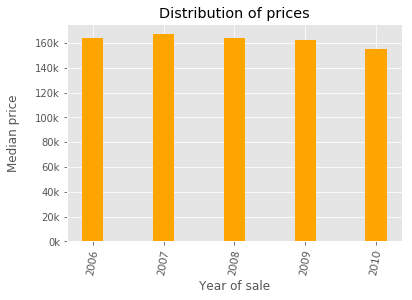

In [12]:
years = mp['YrSold'].tolist()
x_pos = np.arange(len(years))

median_prices = mp['MedianPrice'].tolist()

plt.bar(left=x_pos, height=median_prices, width=0.3, color='orange')
plt.xticks(x_pos, years, rotation=80, fontname=CUSTOM_FONT_NAME, fontsize=CUSTOM_FONT_SIZE)
plt.xlabel('Year of sale')
plt.ylabel('Median price', labelpad=15)
plt.title('Distribution of prices')

axis = plt.gca()
axis.yaxis.set_major_formatter(formatter)

plt.rcParams['figure.figsize'] = CUSTOME_FIGURE_SIZE

In [13]:
mp = pd.DataFrame({'MedianPrice': df.groupby('MoSold')['SalePrice'].median()}).reset_index()
mp

,MoSold,MedianPrice
0,1,151650
1,2,173250
2,3,165250
3,4,147000
4,5,154000
5,6,163000
6,7,165195
7,8,174450
8,9,185900
9,10,159000


In [14]:
ma = pd.DataFrame({'MedianArea': df.groupby('MoSold')['GrLivArea'].median()}).reset_index()
ma

,MoSold,MedianArea
0,1,1402.5
1,2,1487.0
2,3,1409.0
3,4,1386.0
4,5,1368.5
5,6,1478.0
6,7,1480.5
7,8,1504.0
8,9,1582.0
9,10,1414.0


In [15]:
ma = pd.merge(ma, mp, on='MoSold')
ma['MoSold'] = ma['MoSold'].apply(func=lambda x : calendar.month_name[x])
ma

,MoSold,MedianArea,MedianPrice
0,January,1402.5,151650
1,February,1487.0,173250
2,March,1409.0,165250
3,April,1386.0,147000
4,May,1368.5,154000
5,June,1478.0,163000
6,July,1480.5,165195
7,August,1504.0,174450
8,September,1582.0,185900
9,October,1414.0,159000


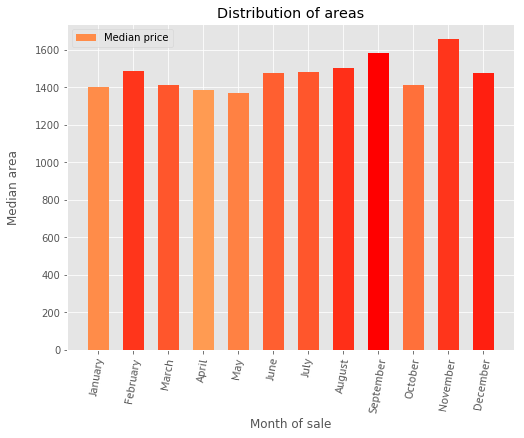

In [16]:
months = ma['MoSold'].tolist()
x_pos = np.arange(len(months))

median_areas = ma['MedianArea'].tolist()
median_prices = ma['MedianPrice'].tolist()

colors = cm.rainbow(np.array(median_prices) / max(median_prices))

plt.bar(left=x_pos, height=median_areas, width=0.6, color=colors)
plt.xticks(x_pos, months, rotation=80, fontname=CUSTOM_FONT_NAME, fontsize=CUSTOM_FONT_SIZE)
plt.xlabel('Month of sale')
plt.ylabel('Median area', labelpad=15)
plt.title('Distribution of areas')
plt.legend(['Median price'])

plt.rcParams['figure.figsize'] = CUSTOME_FIGURE_SIZE

### Для удобства  будем отдельно рассматривать столбцы, соответствующие входным признакам (матрица X), а отдельно – выделенный признак (вектор y):

In [17]:
X = df.drop((PD_TARGET_VARIABLE_COLUMN_NAME), axis=1)
y = df[PD_TARGET_VARIABLE_COLUMN_NAME]

In [18]:
X.shape

(1460, 79)

In [19]:
y.shape

(1460,)

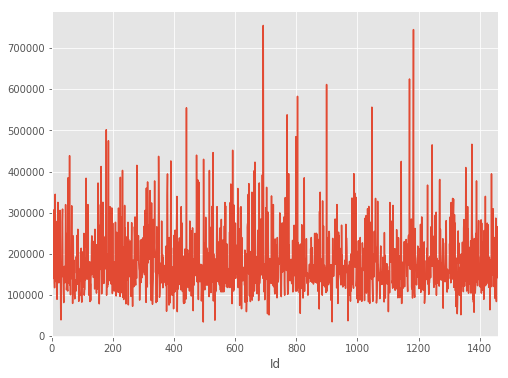

In [20]:
y.plot()

In [21]:
y = y.apply(np.log)

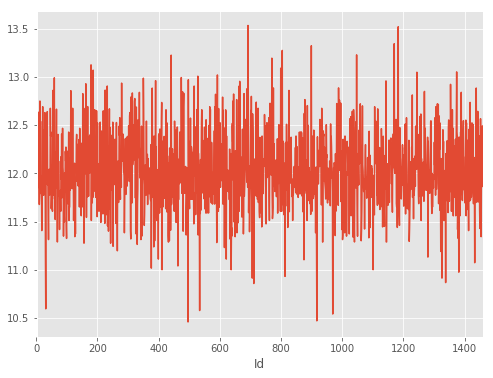

In [22]:
y.plot()

### Выделим числовые и категориальные признаки:

In [23]:
categorical_columns = [c for c in X.columns if X[c].dtype.name == 'object']
numerical_columns   = [c for c in X.columns if X[c].dtype.name != 'object']

In [24]:
print(categorical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [25]:
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


### Определим полный перечень значений категориальных признаков:

In [26]:
for c in categorical_columns:
    print(X[c].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll' 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng'

# Подготовка данных

### Проверим наличие незаполненных элементов и узнаем их количество:

#### Для количественных признаков:

In [27]:
X[numerical_columns].isnull().values.any()

True

In [28]:
X[numerical_columns].isnull().sum().sum()

348

In [29]:
y.isnull().values.any()

False

#### Для категориальных признаков:

In [30]:
X[categorical_columns].isnull().values.any()

True

In [31]:
X[categorical_columns].isnull().sum().sum()

6617

### Заполним пропущенные значения:

#### Для количественных признаков:

In [32]:
X = X.fillna(X.median(axis=0), axis=0)

#### Для категориальных признаков:

In [33]:
data_describe = X.describe(include=[object])
for c in categorical_columns:
    X[c] = X[c].fillna(data_describe[c]['top'])

### Проверим наличие незаполненных элементов:

In [34]:
X.isnull().values.any()

False

## Преобразуем категориальные признаки в количественные:

### Выделим бинарные и небинарные признаки:

In [35]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

In [36]:
print(binary_columns)

['Street', 'Alley', 'Utilities', 'CentralAir']


In [37]:
print(nonbinary_columns )

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### Значения бинарных признаков заменим на 0 и 1:

In [38]:
for c in binary_columns:
    top = data_describe[c]['top']
    top_items = X[c] == top
    X.loc[top_items, c] = 0
    X.loc[np.logical_not(top_items), c] = 1

In [39]:
X[binary_columns].describe()

,Street,Alley,Utilities,CentralAir
count,1460,1460,1460,1460
unique,2,2,2,2
top,0,0,0,0
freq,1454,1419,1459,1365


### К небинарными признакам применим метод векторизаци:

In [40]:
data_nonbinary = pd.get_dummies(X[nonbinary_columns])

In [41]:
data_nonbinary.columns

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_Bnk',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=244)

### Стандартизируем значения входных признаков:

In [42]:
data_numerical = X[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()

In [43]:
data_numerical.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-1.548229e-16,2.822134e-16,-7.585257e-17,2.644764e-16,4.050033e-16,1.061442e-15,4.505985e-15,-1.780919e-16,-1.961901e-17,-1.657730e-16,...,1.596896e-18,1.539104e-16,9.022463e-17,1.649366e-16,4.386141e-16,-7.969272e-17,-6.183600e-16,-1.173529e-16,6.681299e-17,3.563078e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.722639e-01,-2.218286e+00,-9.234128e-01,-3.687150e+00,-4.111561e+00,-3.286697e+00,-1.688790e+00,-5.705546e-01,-9.726849e-01,-2.885540e-01,...,-2.212205e+00,-7.519182e-01,-7.042419e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,-1.968437e+00,-1.367186e+00
25%,-8.722639e-01,-4.477866e-01,-2.968890e-01,-7.948791e-01,-5.170227e-01,-5.717268e-01,-8.653621e-01,-5.705546e-01,-9.726849e-01,-2.885540e-01,...,-6.476941e-01,-7.519182e-01,-7.042419e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,-4.889425e-01,-6.142282e-01
50%,-1.630536e-01,-3.920970e-02,-1.040277e-01,-7.181151e-02,-5.170227e-01,5.735183e-02,4.424348e-01,-5.705546e-01,-1.318570e-01,-2.885540e-01,...,3.283304e-02,-7.519182e-01,-3.269178e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,-1.190689e-01,1.387300e-01
75%,3.097533e-01,4.147646e-01,1.086708e-01,6.512561e-01,3.816120e-01,9.513056e-01,9.268040e-01,3.382527e-01,5.889309e-01,-2.885540e-01,...,4.818406e-01,5.884489e-01,3.220798e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,6.206783e-01,8.916881e-01
max,3.146594e+00,1.103776e+01,2.051125e+01,2.820459e+00,3.077516e+00,1.282400e+00,1.217426e+00,8.282363e+00,1.140185e+01,8.848606e+00,...,4.420012e+00,6.085550e+00,7.551611e+00,8.672338e+00,1.721134e+01,8.338605e+00,1.829991e+01,3.115459e+01,2.100173e+00,1.644646e+00


## Соединим все столбцы в одну таблицу:

In [44]:
X = pd.concat((data_numerical, X[binary_columns], data_nonbinary), axis=1)
X = pd.DataFrame(X, dtype=float)

In [45]:
X.shape

(1460, 284)

In [46]:
y.shape

(1460,)

In [47]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073350,-0.220799,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.513928,0.575228,-0.288554,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.872264,0.460162,-0.091855,-0.071812,2.178881,0.156680,-0.429430,-0.570555,1.171591,-0.288554,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.073350,-0.084607,0.073455,0.651256,-0.517023,0.984415,0.829930,0.325803,0.092875,-0.288554,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.309753,-0.447787,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.570555,-0.499103,-0.288554,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.073350,0.641752,0.375020,1.374324,-0.517023,0.951306,0.733056,1.366021,0.463410,-0.288554,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
feature_names = X.columns                                       

# Обучающая и тестовая выборки

### Разобьём данные на обучающую/тестовую выборки в отношении
#### $ (1 - $ SKLEARN_TEST_SPLIT_TEST_SIZE$)$  :  SKLEARN_TEST_SPLIT_TEST_SIZE (70% :  30%):

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = SKLEARN_TEST_SPLIT_TEST_SIZE,
                                                    random_state = SKLEARN_TEST_SPLIT_RANDOM_STATE)

In [50]:
n_train, _ = X_train.shape 
n_test,  _ = X_test.shape 
print(n_train)
print(n_test)

1022
438


In [51]:
print(y_train.shape[0])
print(y_test.shape[0])

1022
438


# Обучение модели из sklearn 

### Обучим модель линейной регрессии:

In [52]:
model = LinearRegression(n_jobs=SKLEARN_USED_CPUS_COUNT)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

### Предскажем значения целевого признака по входным признакам:

In [53]:
predicted_y_train = model.predict(X_train)
predicted_y_test = model.predict(X_test)

###  Оценим результат по метрике Mean Absolute Error (MAE):

In [54]:
mae_train = metrics.mean_absolute_error(y_train, predicted_y_train)

In [55]:
mae_train

0.059191082849798078

In [56]:
mae_test = metrics.mean_absolute_error(y_test , predicted_y_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd21984c1d0>]], dtype=object)

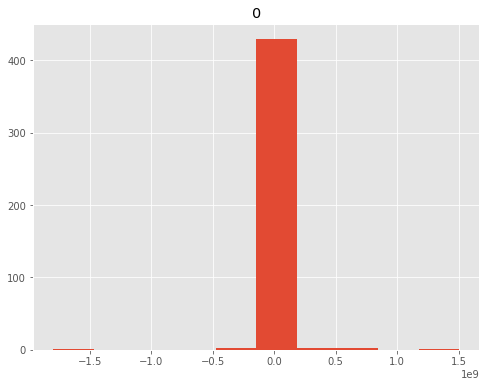

In [57]:
pd.DataFrame(predicted_y_test).hist()

In [58]:
mae_test

17396492.682587452

###  Оценим результат по метрике Root Mean Squared Logarithmic Error (RMSLE)

In [59]:
min(y_train)

10.460242108190519

In [60]:
min(predicted_y_train)

10.809056282043457

In [61]:
min(y_test)

10.47194980911048

In [62]:
min(predicted_y_test)

-1796083644.1515522

#### Избавимся от отрицательных значений выделенного признака:

In [63]:
CONST_VALUE_TRAIN = -min(np.append(y_train.values, predicted_y_train))

y_train_modefied = y_train.apply(lambda x : x + CONST_VALUE_TRAIN)
predicted_y_train_modefied = np.apply_along_axis(func1d=lambda x : x + CONST_VALUE_TRAIN, axis=0, arr=predicted_y_train)

CONST_VALUE_TEST = -min(np.append(y_test.values, predicted_y_test))

y_test_modefied = y_test.apply(lambda x : x + CONST_VALUE_TEST)
predicted_y_test_modefied = np.apply_along_axis(func1d=lambda x : x + CONST_VALUE_TEST, axis=0, arr=predicted_y_test)

In [64]:
rmsle_train = np.sqrt(metrics.mean_squared_log_error(y_train_modefied, predicted_y_train_modefied))
# rmsle_train = metrics.mean_squared_log_error(y_train, predicted_y_train)

In [65]:
rmsle_train

0.036897522979534851

In [66]:
rmsle_test = np.sqrt(metrics.mean_squared_log_error(y_test_modefied, predicted_y_test_modefied))
# rmsle_test = metrics.mean_squared_log_error(y_test, predicted_y_test)

In [67]:
rmsle_test

1.019227854554033

### Отберём признаки (Feature Selection) с помощью алгоритма случайного леса:

In [68]:
rf = ensemble.RandomForestRegressor(n_estimators=SKLEARN_RANDOM_FOREST_CLASSIFIER_N_ESTIMATORS, 
                                     random_state=SKLEARN_RANDOM_FOREST_CLASSIFIER_RANDOM_STATE)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=13, verbose=0, warm_start=False)

In [69]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [70]:
print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'OverallQual' (0.4724)
 2. feature 'GrLivArea' (0.1713)
 3. feature 'TotalBsmtSF' (0.0555)
 4. feature 'GarageArea' (0.0545)
 5. feature 'BsmtFinSF1' (0.0227)
 6. feature '1stFlrSF' (0.0212)
 7. feature 'OverallCond' (0.0157)
 8. feature 'YearBuilt' (0.0146)
 9. feature 'CentralAir' (0.0143)
10. feature 'GarageCars' (0.0140)
11. feature 'LotArea' (0.0109)
12. feature 'GarageFinish_Unf' (0.0088)
13. feature 'YearRemodAdd' (0.0082)
14. feature 'MSZoning_RM' (0.0075)
15. feature 'LotFrontage' (0.0065)
16. feature 'BsmtUnfSF' (0.0050)
17. feature 'OpenPorchSF' (0.0047)
18. feature 'Fireplaces' (0.0040)
19. feature 'GarageYrBlt' (0.0037)
20. feature 'MoSold' (0.0035)
21. feature '2ndFlrSF' (0.0034)
22. feature 'MasVnrArea' (0.0030)
23. feature 'WoodDeckSF' (0.0028)
24. feature 'BsmtQual_Ex' (0.0024)
25. feature 'SaleCondition_Family' (0.0019)
26. feature 'PavedDrive_N' (0.0018)
27. feature 'TotRmsAbvGrd' (0.0018)
28. feature 'ExterQual_TA' (0.0017)
29. featu

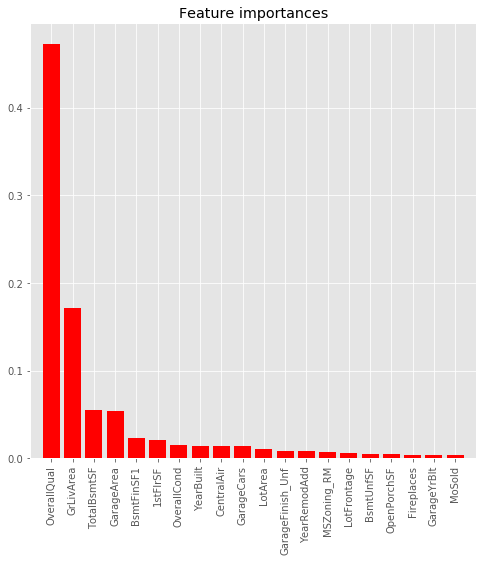

In [71]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center', color='red')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [72]:
analyze_x = []
analyze_y = []
for f in np.arange(1, 200, 1):
    best_features = np.array(feature_names)[indices[:f]]
    best_X = X[best_features]
    best_X_train, best_X_test, best_y_train, best_y_test = train_test_split(best_X, y,
                                                                            test_size = SKLEARN_TEST_SPLIT_TEST_SIZE,
                                                                            random_state = SKLEARN_TEST_SPLIT_RANDOM_STATE)
    clf = LinearRegression(n_jobs=SKLEARN_USED_CPUS_COUNT)
    clf.fit(best_X_train, best_y_train)
    predicted_best_y_test = clf.predict(best_X_test)
    
    analyze_x.append(f)
    analyze_y.append(metrics.mean_absolute_error(best_y_test, predicted_best_y_test))

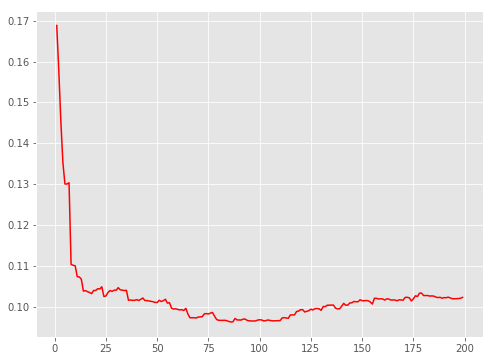

In [73]:
plt.plot(analyze_x, analyze_y, color='red')
plt.show()

In [74]:
min_mae, idx = min((val, idx) for (idx, val) in enumerate(analyze_y))

In [75]:
min_mae

0.096257725201738198

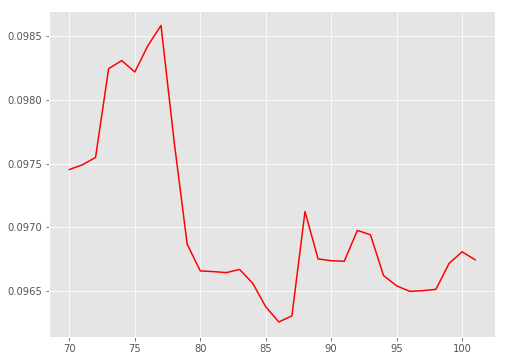

In [76]:
plt.plot(analyze_x[idx-16:idx+16], analyze_y[idx-16:idx+16], color='red')
plt.show()

In [77]:
best_X = X[best_features[0:idx+1]]
best_X_train, best_X_test, best_y_train, best_y_test = train_test_split(best_X, y,
                                                                            test_size = SKLEARN_TEST_SPLIT_TEST_SIZE,
                                                                            random_state = SKLEARN_TEST_SPLIT_RANDOM_STATE)
model = LinearRegression(n_jobs=SKLEARN_USED_CPUS_COUNT)
model.fit(best_X_train, best_y_train)
predicted_best_y_test = model.predict(best_X_test)

In [78]:
mae = metrics.mean_absolute_error(best_y_test, predicted_best_y_test)

In [79]:
mae

0.096257725201738198

In [80]:
CONST_VALUE_BEST_TEST = -min(np.append(best_y_test.values, predicted_best_y_test))

best_y_test_modefied = best_y_test.apply(lambda x : x + CONST_VALUE_BEST_TEST)
predicted_best_y_test_modefied = np.apply_along_axis(func1d=lambda x : x + CONST_VALUE_TEST,
                                                     axis=0,
                                                     arr=predicted_best_y_test)

In [81]:
rmsle_best_test = np.sqrt(metrics.mean_squared_log_error(best_y_test_modefied, predicted_best_y_test_modefied))

In [82]:
rmsle_best_test

20.377477793120821

## Реализация линейной регрессии

In [83]:
class LinRegression:
    """Линейная регрессия."""
    def __init__(self):
        self.w = []
    
    def computeCost(self, X, y):
        tobesummed = np.power(((X @ self.w.T)-y),2)
        return np.sum(tobesummed)/(2 * len(X))
    
    def fit(self, X, y, iters=3000, alpha=0.99):
        "(Градиентный спуск.)"
        ones = np.ones([X.shape[0],1])
        X = np.hstack((ones,X))                          
        y = y.values
        self.w = np.array([-1.0] * X.shape[1])
        
        cost0 = self.computeCost(X, y)
        
        for i in range(iters):
            w_tmp = self.w
            self.w -= (alpha/X.shape[0]) * np.dot(X.T, (X @ self.w.T - y))
            cost = self.computeCost(X, y)
            
            if (cost > cost0):
                self.w = w_tmp
                break
    def fit2(self, X, y):
        ones = np.ones([X.shape[0],1])
        X = np.hstack((ones,X))                          
        y = y.values
        
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    
    def fit3(self, X, y):
        """(QR разложение.)"""
        ones = np.ones([X.shape[0],1])
        X = np.hstack((ones,X))                          
        y = y.values
        
        q, r = np.linalg.qr(X)
        self.w = np.dot(np.dot(np.linalg.inv(r), q.T), y)
        
    def fit4(self, X, y, lmbd=0.1):
        """Ridge regression (гребневая регрессия)."""
        ones = np.ones([X.shape[0],1])
        X = np.hstack((ones,X))                          
        y = y.values
        
        w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd * np.eye(X.shape[1])), X.T), y)
        
    def fit5(self, X, y, iters=3000, alpha=0.99, lmbd=0.1):
        "Lasso."
        ones = np.ones([X.shape[0],1])
        X = np.hstack((ones,X))                          
        y = y.values
        self.w = np.array([-1.0] * X.shape[1])
        
        cost0 = self.computeCost(X, y)
        
        for i in range(iters):
            w_tmp = self.w
            self.w -= (alpha/X.shape[0]) * np.dot(X.T, (X @ self.w.T - y)) + lmbd * np.sign(self.w)
            cost = self.computeCost(X, y)
            
            if (cost > cost0):
                self.w = w_tmp
                break

    def predict(self, X):
        ones = np.ones([X.shape[0],1])
        return np.dot(np.hstack((ones, X)), self.w)
                                   

In [84]:
def calc_mae(y_true, y_pred):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    return mae

In [85]:
my_model = LinRegression()
my_model.fit(best_X_train, best_y_train, iters=24000, alpha=0.01)

In [86]:
my_y_predicted = my_model.predict(best_X_test)

In [87]:
calc_mae(best_y_test, my_y_predicted)

0.20966355190800953

In [88]:
my_model.fit2(best_X_train, best_y_train)
my_y_predicted = my_model.predict(best_X_test)

In [89]:
calc_mae(best_y_test, my_y_predicted)

36.932562033219249

In [90]:
my_model.fit3(best_X_train, best_y_train)
my_y_predicted = my_model.predict(best_X_test)

In [91]:
calc_mae(best_y_test, my_y_predicted)

0.50900328047013199

In [92]:
my_model.fit4(best_X_train, best_y_train)
my_y_predicted = my_model.predict(best_X_test)

In [1]:
calc_mae(best_y_test, my_y_predicted)

NameError: name 'calc_mae' is not defined

In [94]:
my_model.fit5(best_X_train, best_y_train, iters=12000, alpha=0.1, lmbd=10)
my_y_predicted = my_model.predict(best_X_test)

In [95]:
calc_mae(best_y_test, my_y_predicted)

230.50409355481241

## Подготовка решения для отправки на kaggle:

In [96]:
def process_data(X):
    categorical_columns = [c for c in X.columns if X[c].dtype.name == 'object']
    numerical_columns   = [c for c in X.columns if X[c].dtype.name != 'object']

    # Заполняем пустые значения.
    X = X.fillna(X.median(axis=0), axis=0)

    data_describe = X.describe(include=[object])
    for c in categorical_columns:
        X[c] = X[c].fillna(data_describe[c]['top'])

    # Выделяем бинарные и небинарные признаки.
    binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
    nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

    for c in binary_columns:
        top = data_describe[c]['top']
        top_items = X[c] == top
        X.loc[top_items, c] = 0
        X.loc[np.logical_not(top_items), c] = 1

    data_nonbinary = pd.get_dummies(X[nonbinary_columns])

    # Стандартизируем количественные признаки.
    data_numerical = X[numerical_columns]
    data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()

    X = pd.concat((data_numerical, X[binary_columns], data_nonbinary), axis=1)
    return pd.DataFrame(X, dtype=float)

In [97]:
# Загружаем данные.
file_to_open = data_folder / DATASET_TEST_FILE_NAME
df_test = pd.read_csv(file_to_open, index_col=PD_READ_CSV_INDEX_COL)

X_test = process_data(df_test)

In [98]:
# Get missing columns in the training test
missing_cols = set(X.columns) - set(X_test.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X.columns]

In [99]:
y_predicted = model.predict(X_test[best_features[0:idx+1]])

In [100]:
df_test_result= pd.DataFrame(index=df_test.index, columns=[PD_TARGET_VARIABLE_COLUMN_NAME,], data = y_predicted)

In [101]:
df_test_result.head()

,SalePrice
Id,
1461,-1.261852e+09
1462,6.854661e+08
1463,-1.589215e+07
1464,1.481188e+08
1465,1.172415e+09


In [102]:
 df_test_result.to_csv(SUBMISSION_FILE_NAME)